In [2]:
import pandas as pd 
import numpy as np
from sklearn import *
%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
# Conv1D + LSTM
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.layers import Flatten

In [4]:
df=pd.read_csv("kddcup.data_10_percent_corrected",header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [6]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [7]:
df.columns =['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']

In [8]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Category
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [9]:
df.shape

(494021, 42)

In [10]:
#Analyzing the Dataset
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['Category'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))


Read 494021 rows.
The number of data points are: 494021
The number of features are: 42
The different type of output labels are: {'ipsweep.', 'pod.', 'buffer_overflow.', 'loadmodule.', 'spy.', 'imap.', 'portsweep.', 'nmap.', 'phf.', 'perl.', 'smurf.', 'teardrop.', 'guess_passwd.', 'multihop.', 'warezclient.', 'warezmaster.', 'ftp_write.', 'neptune.', 'back.', 'satan.', 'rootkit.', 'land.', 'normal.'}
The number of different output labels are: 23


In [11]:
# Data Cleaning
# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)
df.dropna(inplace=True,axis=1)

Null values in dataset are 0


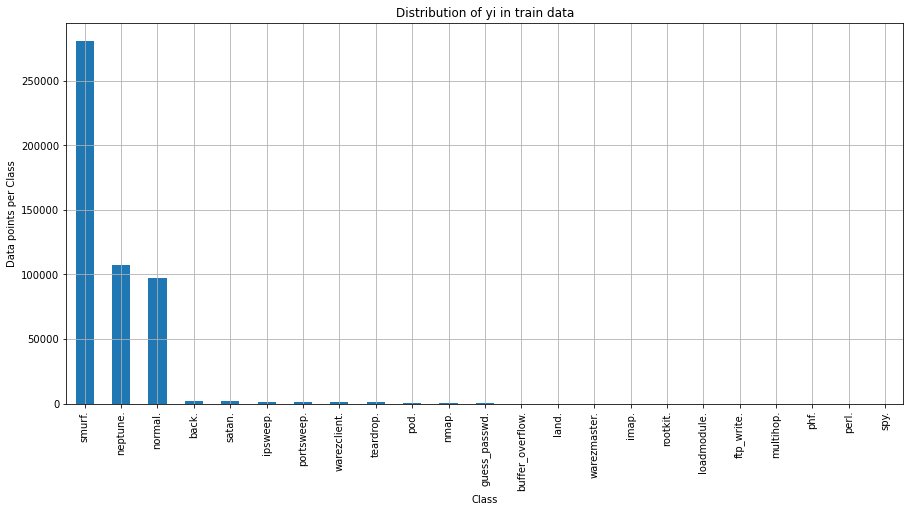

In [13]:
## Exploratory data analysis
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Category'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [12]:
def change_label(df):
    df.Category.replace(['back.','land.','neptune.','pod.','smurf.','teardrop.'],'Dos',inplace=True)
    df.Category.replace(['guess_passwd.','imap.','ftp_write.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)      
    df.Category.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe',inplace=True)
    df.Category.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)

In [13]:
change_label(df)

In [14]:
df.Category.value_counts()

Dos        391458
normal.     97278
Probe        4107
R2L          1126
U2R            52
Name: Category, dtype: int64

In [15]:
df_c=df.copy()

In [16]:
# one -hot coding for object dtypes
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [17]:
encode_text_dummy(df_c, 'protocol_type')

In [18]:
encode_text_dummy(df_c, 'service')
encode_text_dummy(df_c, 'flag')

In [19]:
df_c.dtypes

duration          int64
src_bytes         int64
dst_bytes         int64
land              int64
wrong_fragment    int64
                  ...  
flag-S1           uint8
flag-S2           uint8
flag-S3           uint8
flag-SF           uint8
flag-SH           uint8
Length: 119, dtype: object

In [20]:
df_c.shape

(494021, 119)

In [21]:
df_c.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag-REJ', 'flag-RSTO', 'flag-RSTOS0', 'flag-RSTR', 'flag-S0',
       'flag-S1', 'flag-S2', 'flag-S3', 'flag-SF', 'flag-SH'],
      dtype='object', length=119)

In [22]:
# normalization
def min_max_scaling(df,name):
    df[name] = (df[name] - df[name].min()) / (df[name].max() - df[name].min())

In [23]:
min_max_scaling(df_c, 'duration')

In [24]:
X = df_c.select_dtypes(include=[np.float64, np.int64])

In [25]:
X.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [26]:
min_max_scaling(df_c, 'src_bytes')
min_max_scaling(df_c, 'dst_bytes')
min_max_scaling(df_c, 'land')
min_max_scaling(df_c, 'wrong_fragment')
min_max_scaling(df_c, 'urgent')
min_max_scaling(df_c, 'hot')
min_max_scaling(df_c, 'num_failed_logins')
min_max_scaling(df_c, 'logged_in')
min_max_scaling(df_c, 'num_compromised')
min_max_scaling(df_c, 'root_shell')
min_max_scaling(df_c, 'su_attempted')
min_max_scaling(df_c, 'num_root')
min_max_scaling(df_c, 'num_file_creations')
min_max_scaling(df_c, 'num_shells')
min_max_scaling(df_c, 'num_access_files')

min_max_scaling(df_c, 'is_guest_login')
min_max_scaling(df_c, 'count')

In [27]:
min_max_scaling(df_c, 'is_host_login')
min_max_scaling(df_c, 'srv_count')
min_max_scaling(df_c, 'serror_rate')
min_max_scaling(df_c, 'srv_serror_rate')
min_max_scaling(df_c, 'rerror_rate')
min_max_scaling(df_c, 'srv_rerror_rate')
min_max_scaling(df_c, 'same_srv_rate')
min_max_scaling(df_c, 'diff_srv_rate')
min_max_scaling(df_c, 'srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_count')
min_max_scaling(df_c, 'diff_srv_rate')     
min_max_scaling(df_c, 'srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_count')
min_max_scaling(df_c, 'dst_host_srv_count')
min_max_scaling(df_c, 'dst_host_same_srv_rate')
min_max_scaling(df_c, 'dst_host_diff_srv_rate')
min_max_scaling(df_c, 'dst_host_same_src_port_rate')
min_max_scaling(df_c, 'dst_host_srv_diff_host_rate')
min_max_scaling(df_c, 'dst_host_serror_rate')
min_max_scaling(df_c, 'dst_host_srv_serror_rate')
min_max_scaling(df_c, 'dst_host_rerror_rate')
min_max_scaling(df_c, 'dst_host_srv_rerror_rate')

In [28]:
df_c.dropna(inplace=True,axis=1)

In [29]:
# Convert to numpy - Classification
#x_columns = df_c.columns.drop('Category')
#x = df_c[x_columns].values
#dummies = pd.get_dummies(df_c['Category']) # Classification
#outcomes = dummies.columns
#num_classes = len(outcomes)
#y = dummies.values

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
multi_label = pd.DataFrame(df_c.Category)

In [32]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
df_c['Category'] = enc_label
#y_mul = multi_data['intrusion']
df_c

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494017,0.0,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494018,0.0,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
494019,0.0,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
inv = le2.inverse_transform(enc_label)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
data1=multi_label.copy()

In [35]:
data1['buying_encoded']=enc_label.values
#data['buying_encoded'] = le2.fit_transform(data['Category'].values)
data1 = data1.drop_duplicates('Category')
print(data1)

      Category  buying_encoded
0      normal.               4
744        U2R               3
7601       Dos               0
15699      R2L               2
22814    Probe               1


In [36]:
inv

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [37]:
df_c['Category']

0         4
1         4
2         4
3         4
4         4
         ..
494016    4
494017    4
494018    4
494019    4
494020    4
Name: Category, Length: 494021, dtype: int32

In [38]:
x_columns = df_c.columns.drop('Category')
x = df_c[x_columns].values
y=df_c['Category'].values

In [39]:
cor_matrix = df_c.corr().abs()

In [42]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                duration  src_bytes  dst_bytes      land  wrong_fragment  \
duration             NaN   0.004258   0.005440  0.000452        0.003235   
src_bytes            NaN        NaN   0.000002  0.000020        0.000139   
dst_bytes            NaN        NaN        NaN  0.000175        0.001254   
land                 NaN        NaN        NaN       NaN        0.000318   
wrong_fragment       NaN        NaN        NaN       NaN             NaN   
...                  ...        ...        ...       ...             ...   
flag-S1              NaN        NaN        NaN       NaN             NaN   
flag-S2              NaN        NaN        NaN       NaN             NaN   
flag-S3              NaN        NaN        NaN       NaN             NaN   
flag-SF              NaN        NaN        NaN       NaN             NaN   
flag-SH              NaN        NaN        NaN       NaN             NaN   

                  urgent       hot  num_failed_logins  logged_in  \
duration        0.0

In [73]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.92)]
print(); print(len(to_drop))


16


In [74]:
to_drop

['num_root',
 'srv_count',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type-icmp',
 'service-ecr_i',
 'service-ftp',
 'flag-REJ',
 'flag-S0',
 'flag-SF']

In [48]:
df_c.shape

(494021, 118)

In [49]:
df_c = df_c[[col for col in df_c if df_c[col].nunique() > 1]]# keep columns where there are more than 1 unique values

In [51]:
df_c.shape

(494021, 117)

In [40]:
df2=df_c.copy()
df2.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag-REJ', 'flag-RSTO', 'flag-RSTOS0', 'flag-RSTR', 'flag-S0',
       'flag-S1', 'flag-S2', 'flag-S3', 'flag-SF', 'flag-SH'],
      dtype='object', length=118)

In [56]:
for i in to_drop:
    if i in df_c.columns:
        print(i)

num_root
srv_count
srv_serror_rate
srv_rerror_rate
dst_host_same_srv_rate
dst_host_same_src_port_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
protocol_type-icmp
service-ecr_i
flag-REJ
flag-S0
flag-SF


In [41]:
df2.drop(['num_root'],axis=1,inplace=True)

In [42]:
df2.drop(['srv_count','srv_serror_rate','srv_rerror_rate','dst_host_same_srv_rate','dst_host_same_src_port_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'],axis=1,inplace=True)

In [43]:
df2.drop(['protocol_type-icmp','service-ecr_i','flag-REJ','flag-S0','flag-SF'],axis=1,inplace=True)

In [44]:
df2.drop(['service-ftp'],axis=1,inplace=True)

In [45]:
df2.shape

(494021, 102)

In [46]:
df2 = df2[[col for col in df2 if df2[col].nunique() > 1]]# keep columns where there are more than 1 unique values

In [47]:
df2.shape

(494021, 101)

In [48]:
x_columns = df2.columns.drop('Category')
x = df2[x_columns].values
y=df2['Category'].values

In [49]:
y_train_multi= df2[['Category']]
X_train_multi= df2.drop(labels=['Category'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (494021, 100) 
y_train has shape: (494021, 1)


In [50]:
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [51]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [52]:
from sklearn.model_selection import train_test_split 

In [53]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)


In [54]:
y_test

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [55]:
X_train = np.reshape(X_train, (X_train.shape[0],1, 10, 10))
X_train.shape

(395216, 1, 10, 10)

In [56]:
X_test = np.reshape(X_test, (X_test.shape[0],1, 10, 10))
X_test.shape

(98805, 1, 10, 10)

In [97]:
batch_input_shape = (X_train.shape[0],1,X_train.shape[2], 10)

In [77]:
#batch_input_shape = (1,X_train.shape[1], 10)

In [98]:
def model():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(64,3,activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(64,3,activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(35,return_sequences=True))
    model.add(Dropout(rate=0.1))
    model.add(LSTM(25))
    model.add(Dropout(rate=0.1))
    model.add(Dense(5,activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    #model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=[keras.metrics.AUC(name='auc')])
    return model

In [85]:
learning_rate=0.001
#batch_size=40
epochs = 25

In [80]:
from keras.layers import TimeDistributed

In [99]:
model = model()

In [100]:
model.build(batch_input_shape)

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (395216, 1, 8, 64)       1984      
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (395216, 1, 4, 64)       0         
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (395216, 1, 2, 64)       12352     
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (395216, 1, 1, 64)       0         
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (395216, 1, 64)         

In [102]:
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)

In [103]:
history = model.fit(X_train, y_train, epochs=25, batch_size=500,validation_split=0.2,callbacks = [early_stop])

Epoch 1/25
633/633 [==============================] - 15s 14ms/step - loss: 0.1329 - auc: 0.9878 - val_loss: 0.0280 - val_auc: 0.9989
Epoch 2/25
633/633 [==============================] - 7s 12ms/step - loss: 0.0224 - auc: 0.9989 - val_loss: 0.0180 - val_auc: 0.9993
Epoch 3/25
633/633 [==============================] - 7s 12ms/step - loss: 0.0157 - auc: 0.9994 - val_loss: 0.0131 - val_auc: 0.9995
Epoch 4/25
633/633 [==============================] - 8s 13ms/step - loss: 0.0124 - auc: 0.9996 - val_loss: 0.0103 - val_auc: 0.9997
Epoch 5/25
633/633 [==============================] - 8s 13ms/step - loss: 0.0096 - auc: 0.9997 - val_loss: 0.0075 - val_auc: 0.9998
Epoch 6/25
633/633 [==============================] - 8s 13ms/step - loss: 0.0067 - auc: 0.9998 - val_loss: 0.0053 - val_auc: 0.9998
Epoch 7/25
633/633 [==============================] - 8s 13ms/step - loss: 0.0032 - auc: 0.9998 - val_loss: 0.0024 - val_auc: 0.9998
Epoch 8/25
633/633 [==============================] - 8s 13ms/step -

In [143]:
model.save("acn_path_cnn_lstm")

INFO:tensorflow:Assets written to: acn_path_cnn_lstm\assets


INFO:tensorflow:Assets written to: acn_path_cnn_lstm\assets


In [89]:
model = keras.models.load_model("acn_path_cnn_lstm")

In [91]:
from keras.utils.vis_utils import plot_model

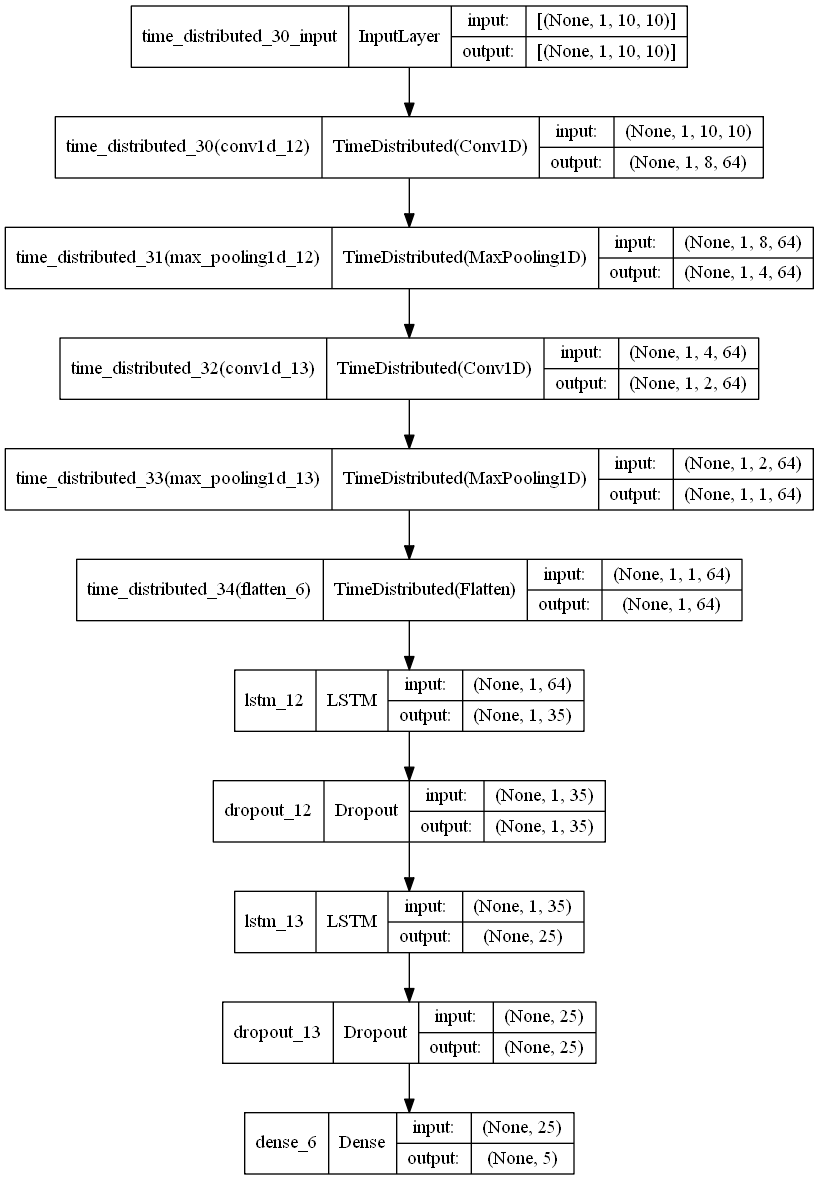

In [104]:
plot_model(model, to_file="multi_input_cnn_lstm_1.png", show_shapes=True, show_layer_names=True)

In [105]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

3088/3088 [==============================] - 7s 2ms/step - loss: 0.0014 - auc: 0.9999A: 0s - loss: 0.0014
Test results - Loss: 0.0013870627153664827 - Accuracy: 99.99113082885742%


In [107]:
import matplotlib.pyplot as plt

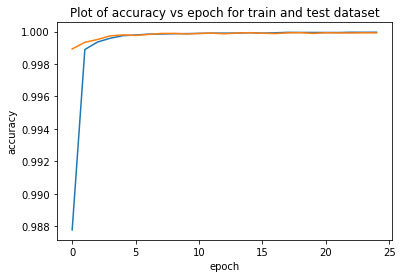

In [108]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

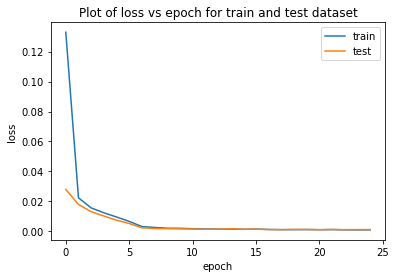

In [109]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [110]:
import sklearn.metrics

In [111]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [112]:
classes_x

array([0, 0, 0, ..., 4, 0, 4], dtype=int64)

In [113]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([0, 0, 0, ..., 4, 0, 4], dtype=int64)

In [114]:
from sklearn.metrics import plot_confusion_matrix

In [161]:
r = sklearn.metrics.multilabel_confusion_matrix(rounded_labels,classes_x)
r

array([[[20448,     2],
        [    2, 78353]],

       [[97951,     4],
        [   14,   836]],

       [[98546,    24],
        [   23,   212]],

       [[98793,     0],
        [    8,     4]],

       [[79409,    43],
        [   26, 19327]]], dtype=int64)

In [115]:
from sklearn.metrics import confusion_matrix  
cmsvm= confusion_matrix(rounded_labels,classes_x)
cmsvm

array([[78352,     2,     0,     0,     1],
       [    0,   839,     0,     0,    11],
       [    0,     1,   206,     0,    28],
       [    0,     1,     2,     5,     4],
       [    3,    24,    19,     1, 19306]], dtype=int64)

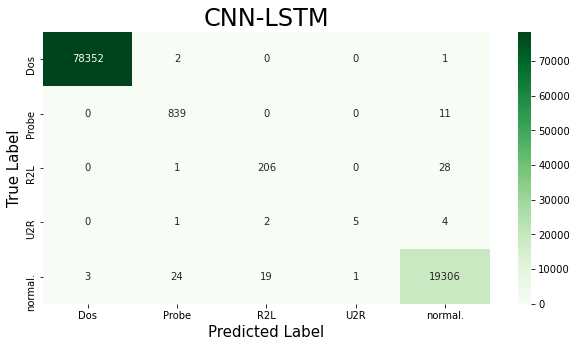

In [116]:
import seaborn as sns
plt.figure(figsize = (10,5))
plt.xlabel = "Predicted label"
x_axis_labels= ['Dos', 'Probe', 'R2L', 'U2R', 'normal.']
y_axis_labels=['Dos', 'Probe', 'R2L', 'U2R', 'normal.']
ax=sns.heatmap(cmsvm,annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt='', cmap="Greens");
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_title( "CNN-LSTM" , size = 24 )
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)